<p align="left">
  <img src="https://wp.ufc.br/assets/sitiomodelo/brasao-2.png" alt="Imagen1" width="50"/>
  <img src="https://mmq.ufc.br/wp-content/uploads/2019/04/mmq-logo-oficial.png" alt="Imagen2" width="160"/>
</p>

## **Universidade Federal do Ceará**
### **Mestrado em Modelagem e Métodos Quantitativos**
## **Carlos Gutiérrez**
---

# Garantir o aceso a GPU

---

In [1]:
!nvidia-smi

Sun Sep 21 05:39:45 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Instalação do YOLOv11

---

In [3]:
%pip install ultralytics supervision roboflow -q
import ultralytics
ultralytics.checks()

Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.3/112.6 GB disk)


**NOTE:** The obtained `result` object stores information about the location, classes, and confidence levels of the detected objects.

## Fine-tunning do YOLO11 no dataset proprio

Nota: antes de treinar o YOLOv11, confiro que os dados estejam localizados na pasta *datasets*. Para alterar o local padrão dos dados que deseja usar para o fine-tuning, você pode fazê-lo através do arquivo settings.json do Ultralytics.

---




In [4]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

import roboflow
roboflow.login()
from roboflow import Roboflow


rf = Roboflow(api_key="hOwgzfLl770frxQcNNHO")
project = rf.workspace("piscinas-2is0y").project("vendedores_ambulantes_pesquisa-pwao5")
version = project.version(8)
dataset = version.download("yolov11")

/content/datasets
visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to vendedores_ambulantes_pesquisa-8 in yolov11:: 100%|██████████| 2150/2150 [00:00<00:00, 6335.14it/s]


## Treinamento

---



In [5]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=100 imgsz=640 plots=True

/content
Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/vendedores_ambulantes_pesquisa-8/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patienc

In [6]:
import yaml
import os, glob

# Cargar archivo data.yaml que Roboflow generó
with open(f"{dataset.location}/data.yaml") as f:
    data_yaml = yaml.safe_load(f)

for split in ["train", "val", "test"]:
    img_dir = os.path.join(dataset.location, data_yaml[split].replace("../", ""))
    images = glob.glob(f"{img_dir}/*.jpg")
    print(f"{split}: {len(images)} imágenes")


train: 963 imágenes
val: 85 imágenes
test: 21 imágenes


In [7]:
import glob

for subset in ["train", "valid", "test"]:
    images = glob.glob(f"{dataset.location}/{subset}/images/*.jpg")
    labels = glob.glob(f"{dataset.location}/{subset}/labels/*.txt")

    total_objs = 0
    for file in labels:
        with open(file) as f:
            total_objs += sum(1 for _ in f)

    print(f"{subset.upper()}:")
    print(f"  Imágenes: {len(images)}")
    print(f"  Etiquetas: {total_objs}")


TRAIN:
  Imágenes: 963
  Etiquetas: 2299
VALID:
  Imágenes: 85
  Etiquetas: 208
TEST:
  Imágenes: 21
  Etiquetas: 63


!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="hOwgzfLl770frxQcNNHO")
project = rf.workspace("piscinas-2is0y").project("vendedores_ambulantes_pesquisa-pwao5")
version = project.version(5)
dataset = version.download("coco")


NOTA: Os resultados do treinamento concluído são salvos em `{HOME}/runs/detect/train/`.

In [8]:
!ls {HOME}/runs/detect/train/

args.yaml			 results.csv	      val_batch0_labels.jpg
BoxF1_curve.png			 results.png	      val_batch0_pred.jpg
BoxP_curve.png			 train_batch0.jpg     val_batch1_labels.jpg
BoxPR_curve.png			 train_batch1.jpg     val_batch1_pred.jpg
BoxR_curve.png			 train_batch2.jpg     val_batch2_labels.jpg
confusion_matrix_normalized.png  train_batch5490.jpg  val_batch2_pred.jpg
confusion_matrix.png		 train_batch5491.jpg  weights
labels.jpg			 train_batch5492.jpg


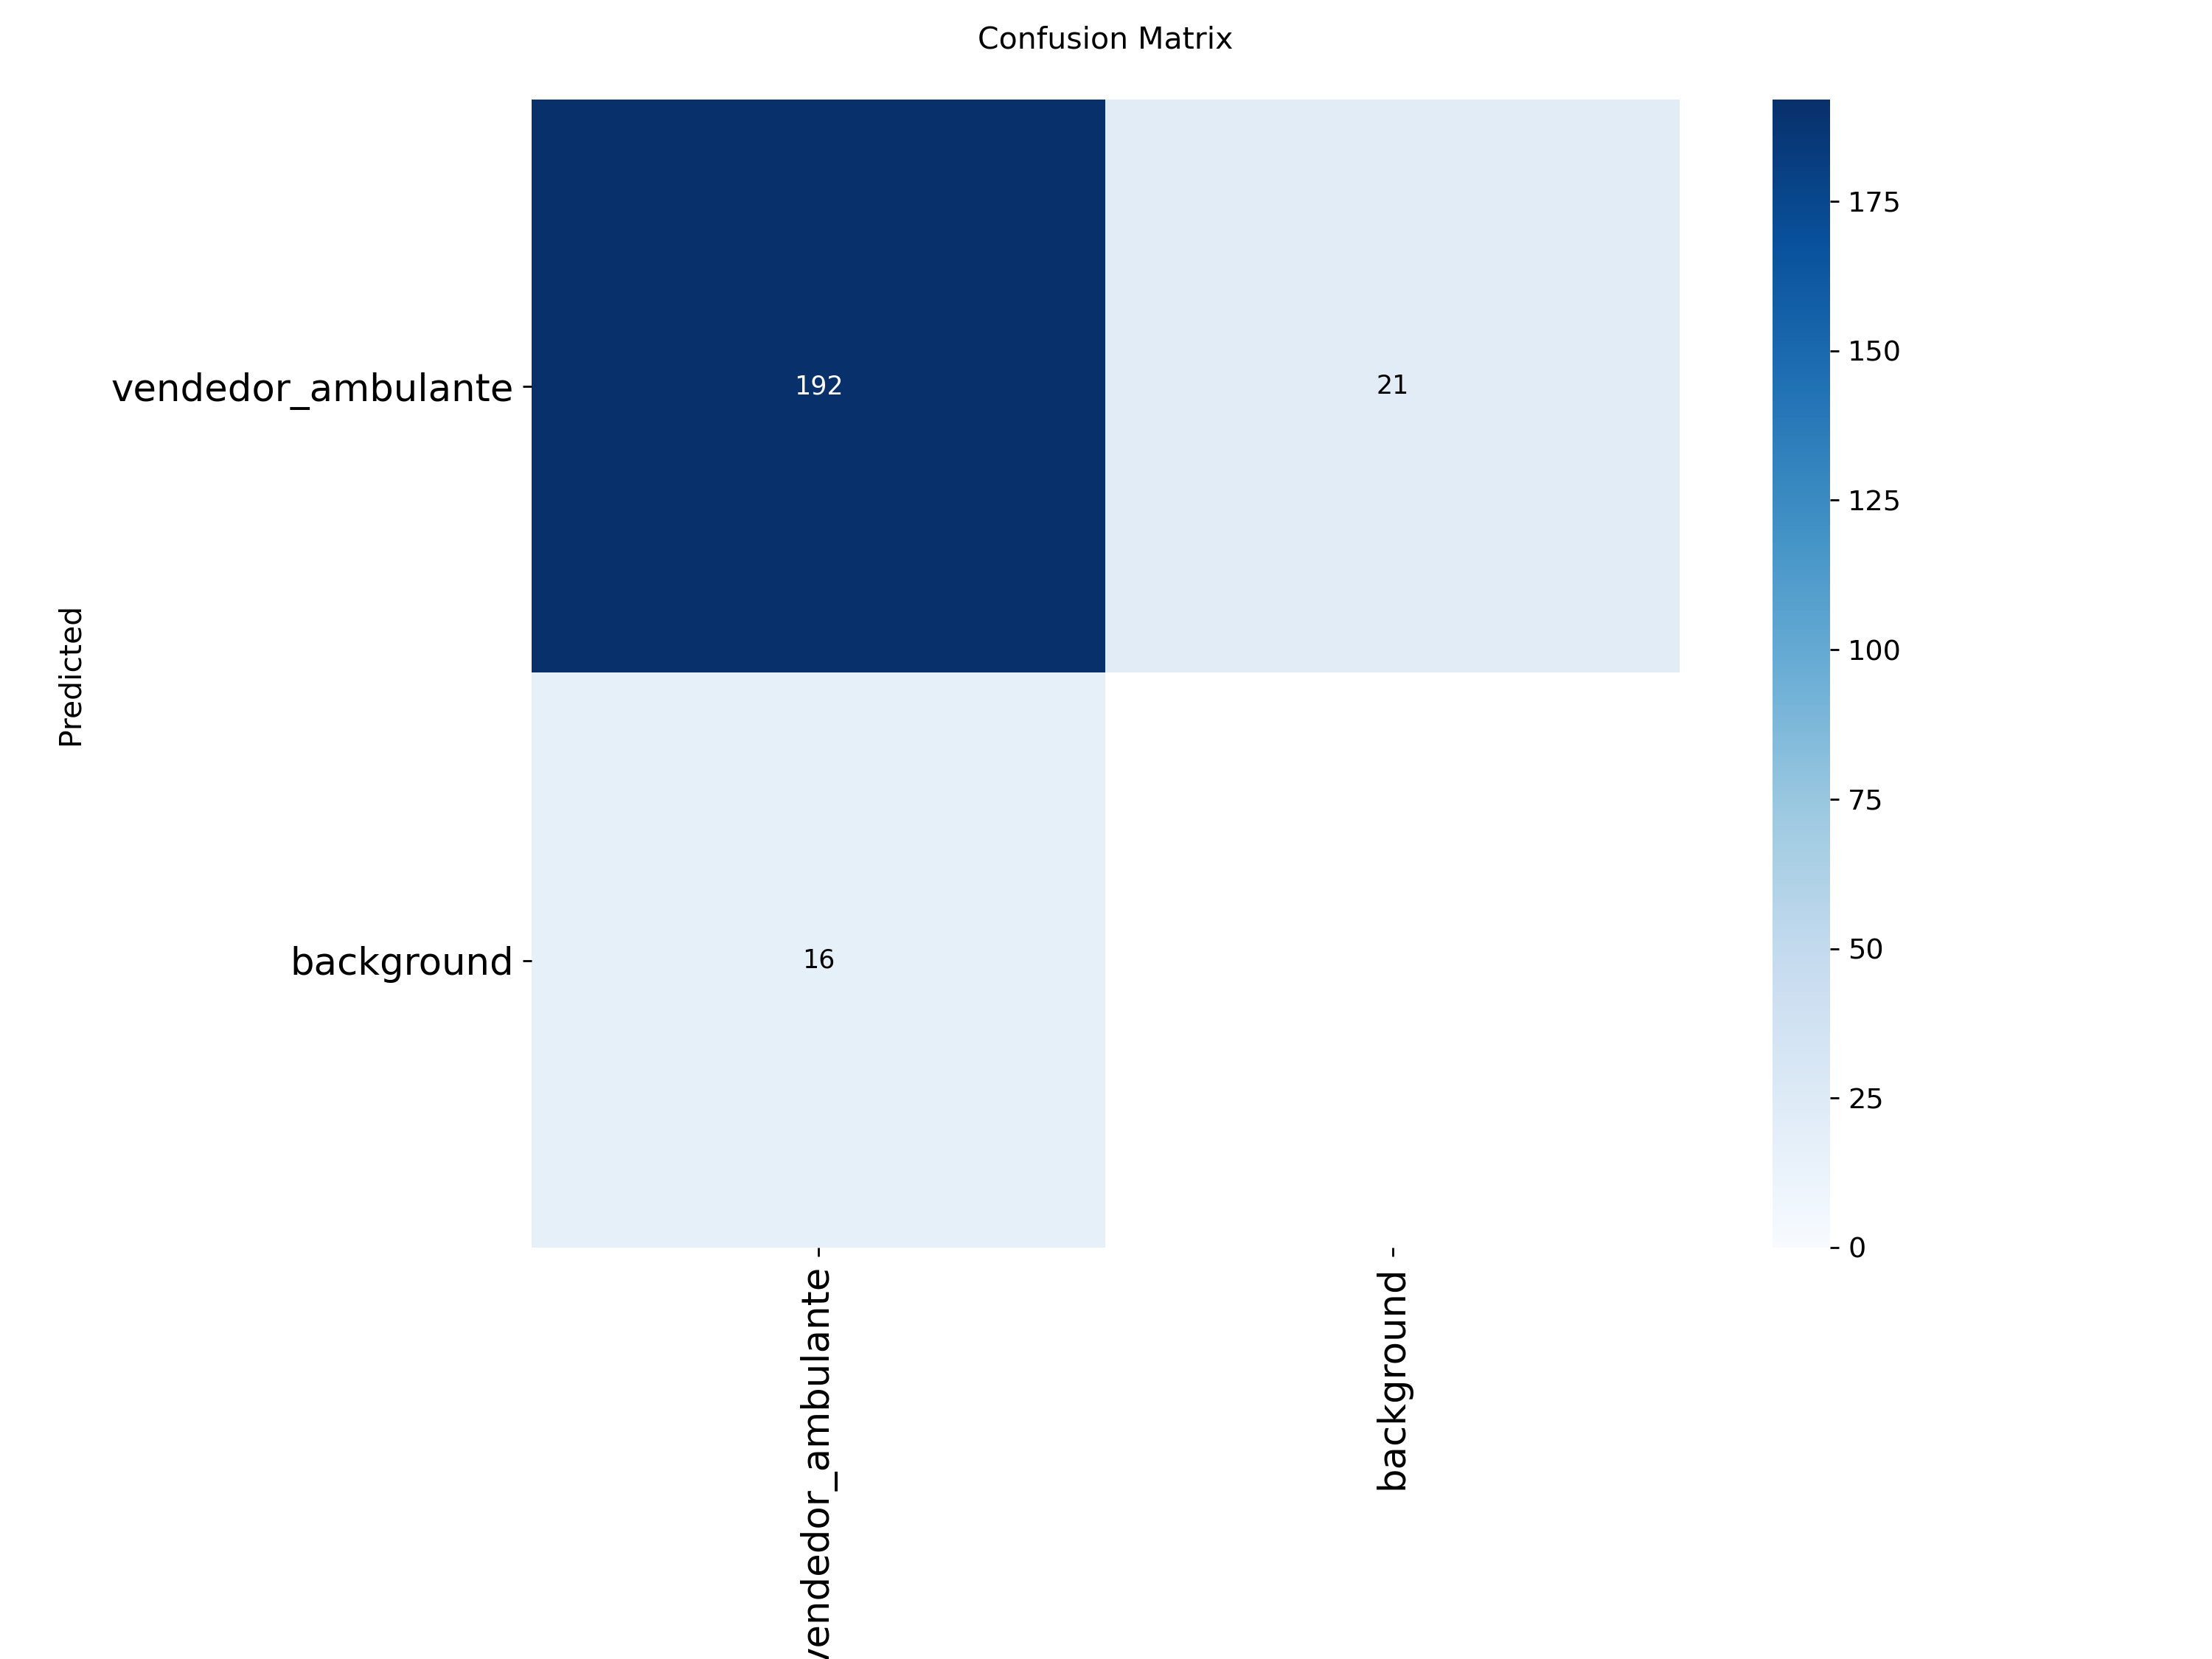

In [9]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

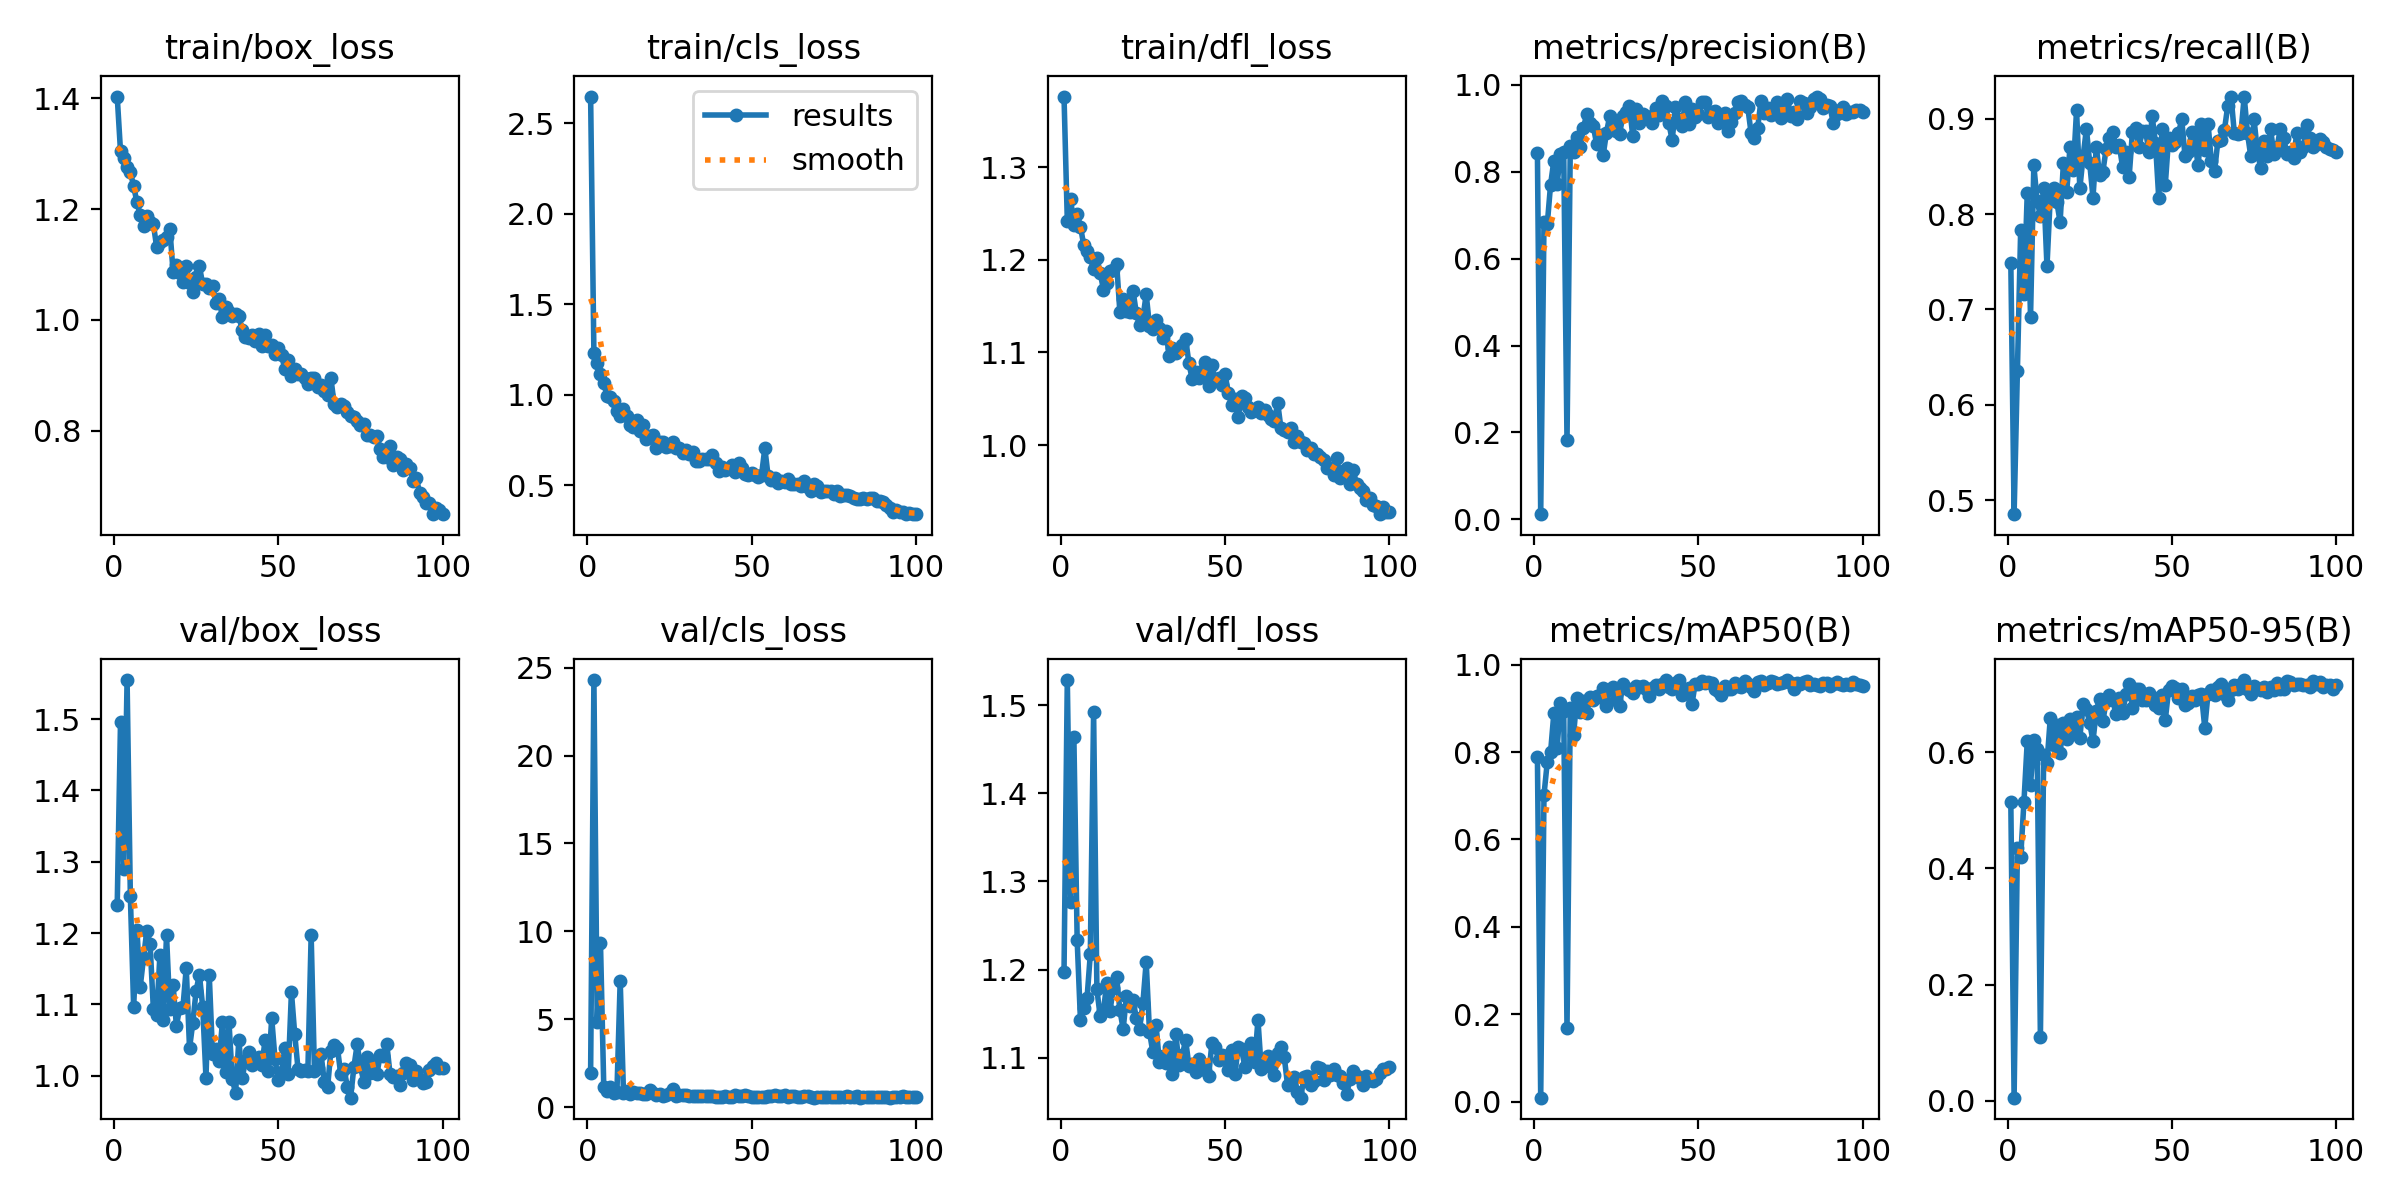

In [10]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

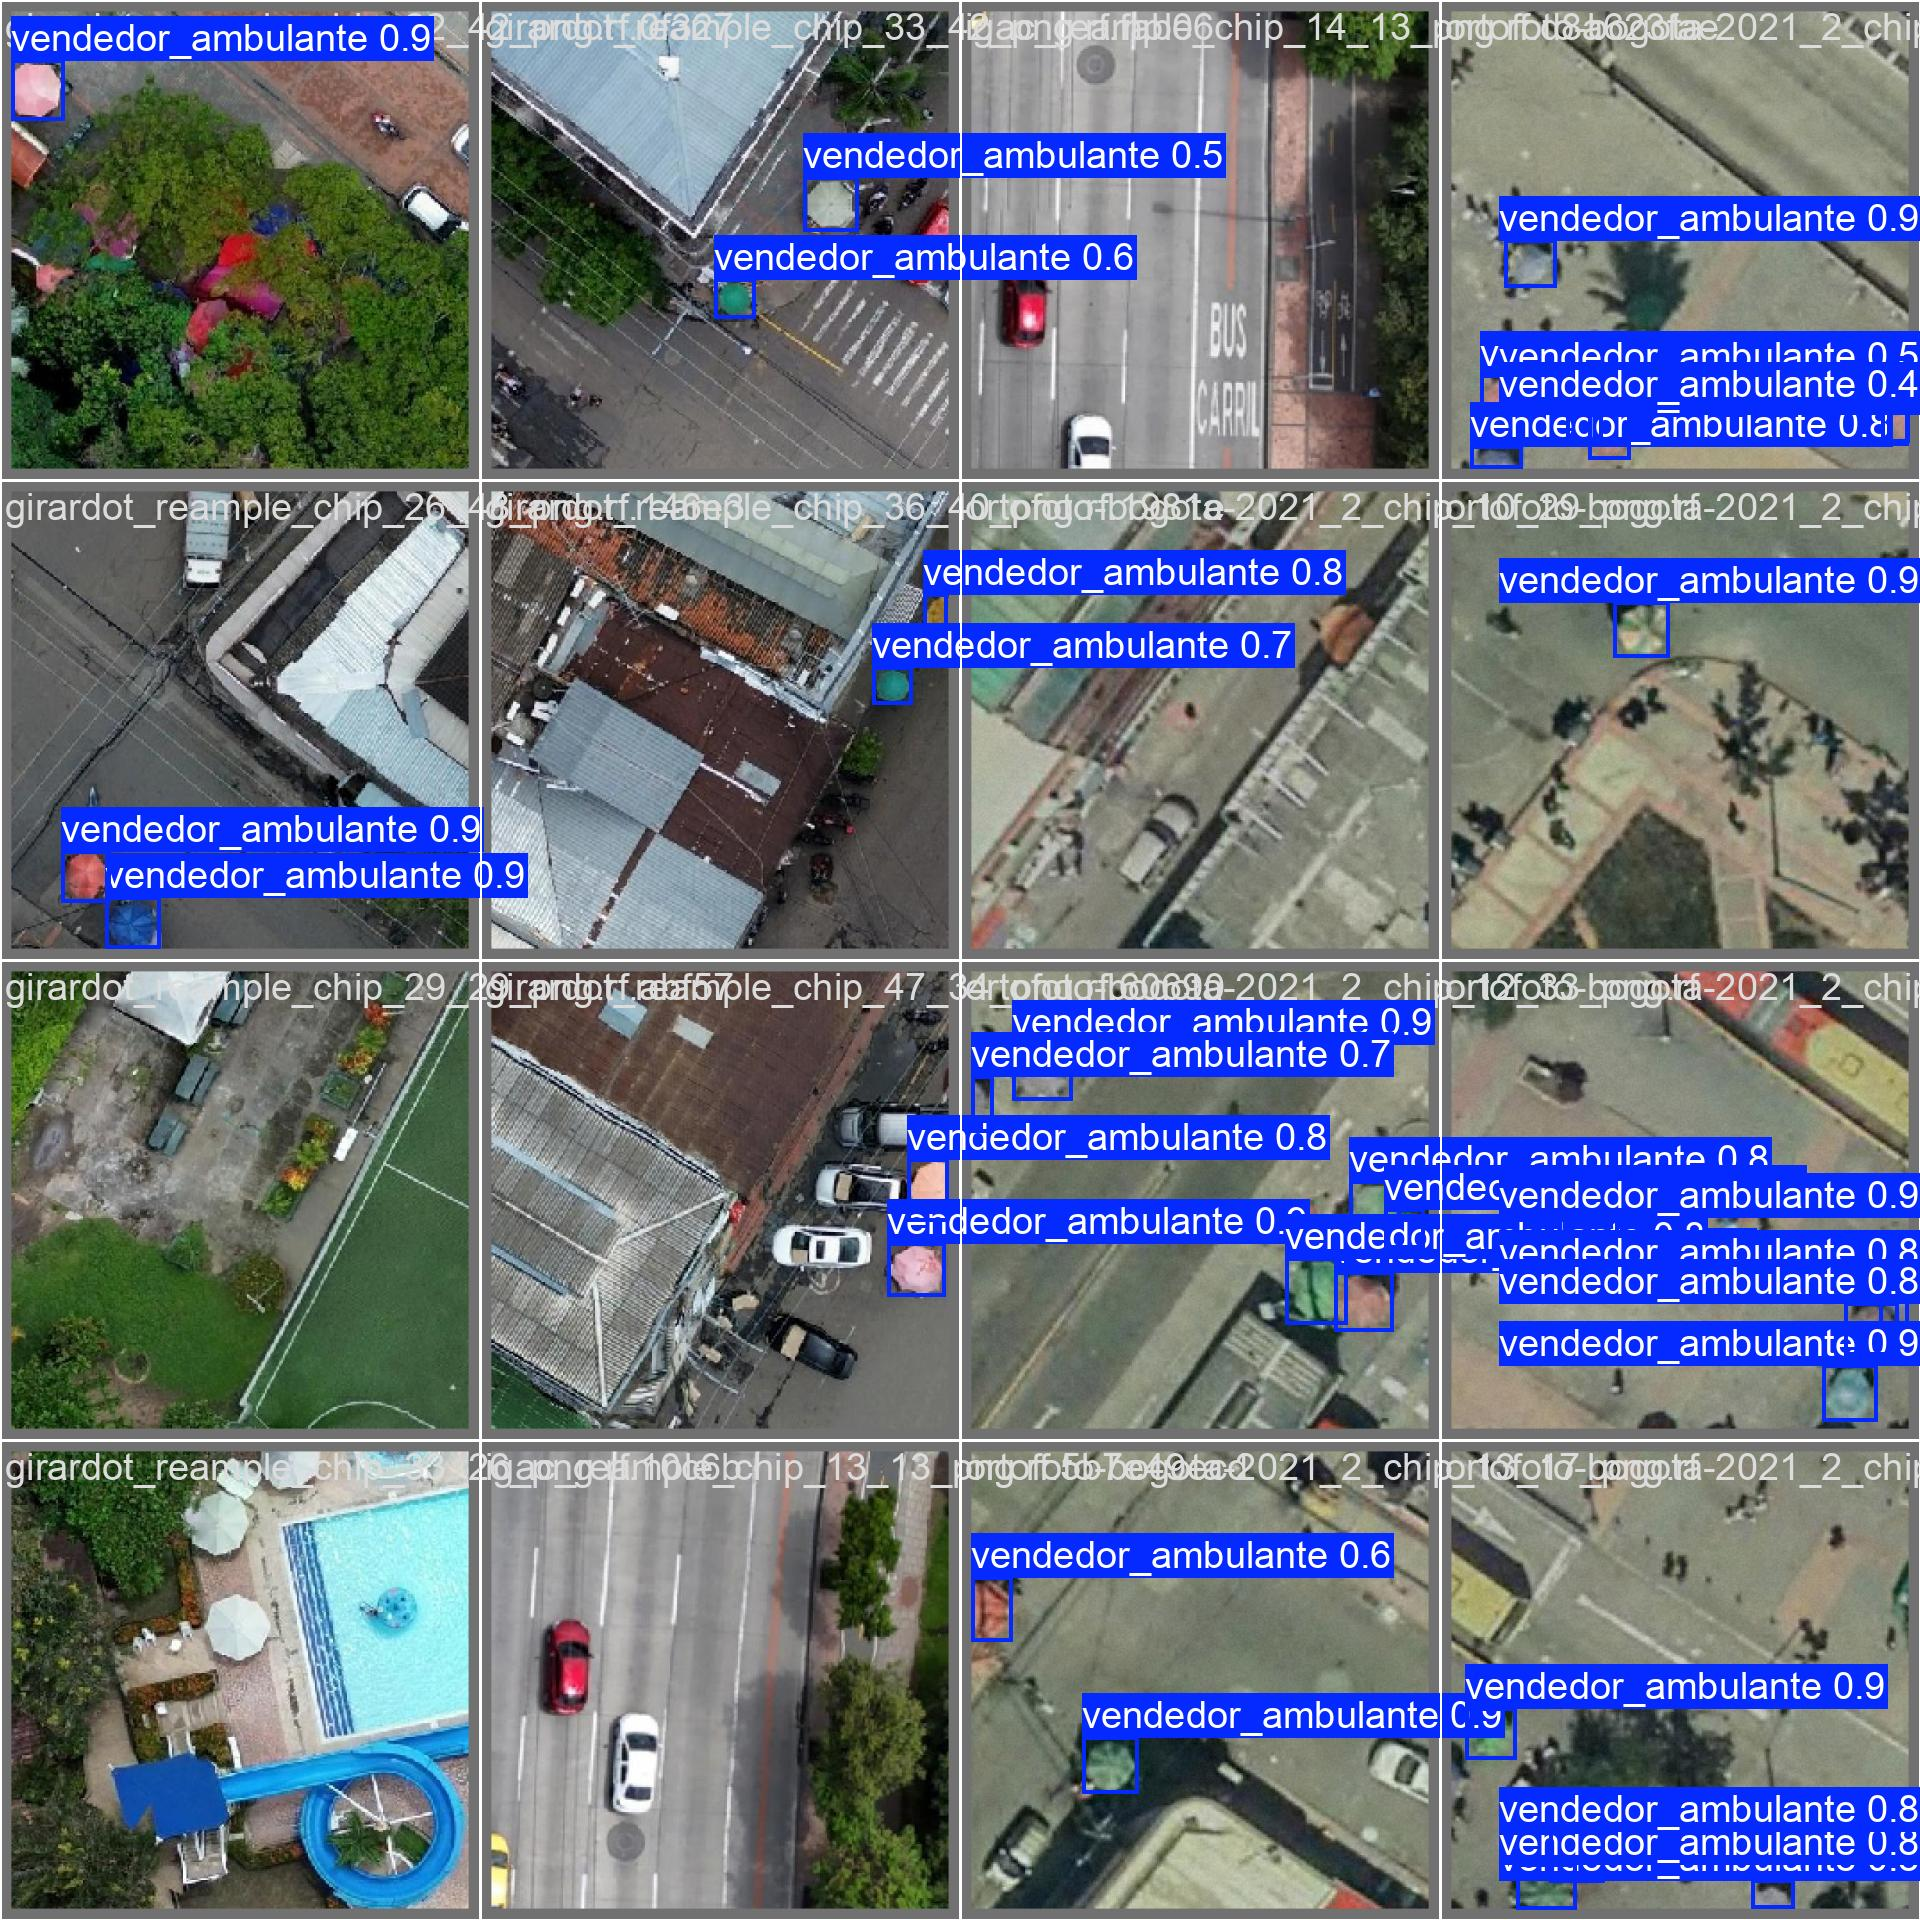

In [12]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width = 1200)

## Validação do modelo com fine-tunning

---

In [13]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1879.1±222.5 MB/s, size: 55.6 KB)
val: Scanning /content/datasets/vendedores_ambulantes_pesquisa-8/valid/labels.cache... 85 images, 13 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 85/85 1.5Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 6/6 1.9it/s 3.1s
                   all         85        208      0.931      0.923      0.962      0.729
Speed: 6.0ms preprocess, 15.9ms inference, 0.0ms loss, 5.1ms postprocess per image
Results saved to /content/runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inferência com o modelo após de fine-tunning

---

In [14]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/21 /content/datasets/vendedores_ambulantes_pesquisa-8/test/images/girardot_reample_chip_20_40_png.rf.5553a48be33cde4221f20fb55259e298.jpg: 640x640 6 vendedor_ambulantes, 15.6ms
image 2/21 /content/datasets/vendedores_ambulantes_pesquisa-8/test/images/girardot_reample_chip_40_39_png.rf.1e38f0f4db0425b24d76488bd931a55f.jpg: 640x640 6 vendedor_ambulantes, 15.6ms
image 3/21 /content/datasets/vendedores_ambulantes_pesquisa-8/test/images/igac_reample_chip_5_4_png.rf.5dc98e135ef1170fe3f6c9bc0dcf23f4.jpg: 640x640 (no detections), 15.5ms
image 4/21 /content/datasets/vendedores_ambulantes_pesquisa-8/test/images/ortofoto-bogota-2021_2_chip_11_75_png.rf.8bee7b4f37a39e11ab13d38bd9d13559.jpg: 640x640 1 vendedor_ambulante, 15.5ms
image 5/21 /content/datasets/vendedores_ambulantes_pesquisa-8/test/images/ortofoto-bogota-2021_2_ch

NOTA: Vamos dar uma olhada em alguns resultados

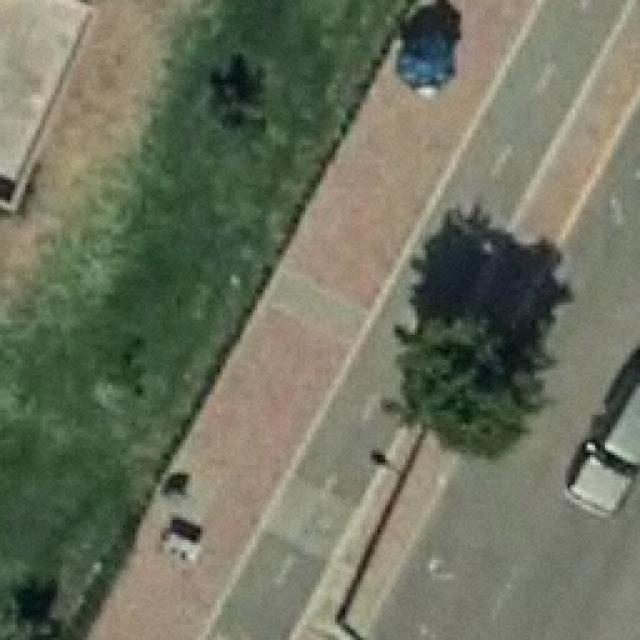

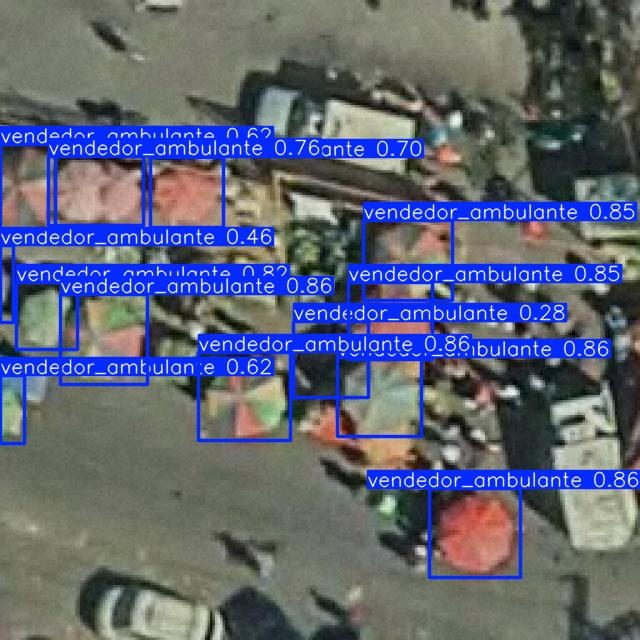

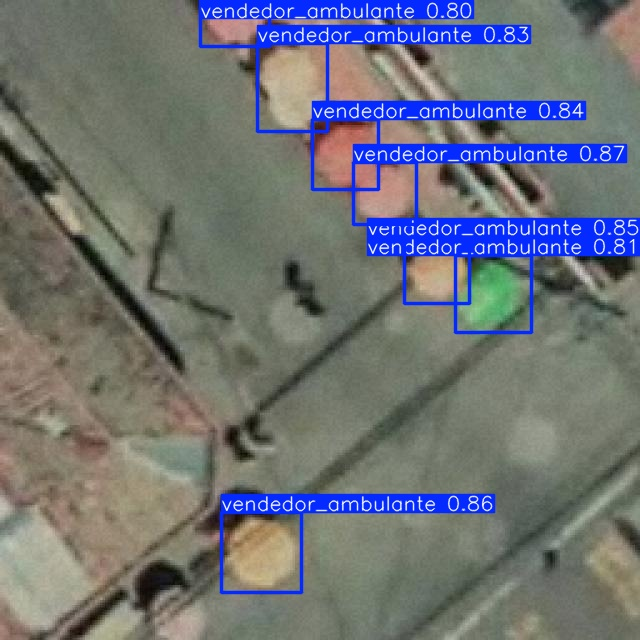

In [15]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

## Deployment
---

In [16]:
project.version(dataset.version).deploy(model_type="yolov11", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/piscinas-2is0y/vendedores_ambulantes_pesquisa-pwao5/9
Share your model with the world at: https://universe.roboflow.com/piscinas-2is0y/vendedores_ambulantes_pesquisa-pwao5/model/9


# Armazenando os resultados

Após o treinamento do modelo YOLOv11, um conjunto de pesos treinados estará pronto para uso. Esses pesos ficam armazenados na pasta `/runs/detect/train/weights/best.pt` do projeto. É possível enviar esses pesos para o Roboflow Deploy e utilizá-los na infraestrutura escalável da plataforma.
A função `.deploy()` do pacote pip do Roboflow agora permite o envio de pesos treinados do YOLOv11.

---

In [18]:
from google.colab import drive
import shutil
import os

# 1. Montar Google Drive
drive.mount('/content/drive')

# 2. Definir ruta de destino en tu Drive
destino = "/content/drive/MyDrive/MMQ/Pesquisa/Detecção de vendedores ambulantes/modelos_yolo/modelo_6_bogota_v8"

# 3. Crear carpeta si no existe
os.makedirs(destino, exist_ok=True)

# 4. Copiar TODO el contenido de /content excepto el propio "drive"
for item in os.listdir("/content"):
    if item != "drive":  # para no copiar la carpeta montada de Drive dentro de sí misma
        s = os.path.join("/content", item)
        d = os.path.join(destino, item)
        if os.path.isdir(s):
            shutil.copytree(s, d, dirs_exist_ok=True)
        else:
            shutil.copy2(s, d)

print("✅ Copia completa en:", destino)

Mounted at /content/drive
✅ Copia completa en: /content/drive/MyDrive/MMQ/Pesquisa/Detecção de vendedores ambulantes/modelos_yolo/modelo_6_bogota_v8
